<a href="https://colab.research.google.com/github/dote7ant/Flight_delay_-prediction/blob/master/1_Thee_Iconic_explorers_Project_Week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tunisia Flight Delay Prediction

## 1. Defining the Question

### Introduction

This challenge was designed specifically for the AI Tunisia Hack 2019, which took place on 20 to 22 September. 

After AI Hack Tunisia, this competition was re-opened as a Knowledge Challenge to allow others in the Zindi community to learn and test their skills.

### a) Specifying the Data Analytic Question

#### Main question.

The aim of the project is to predict the estimated duration of flight delays per flight.



#### Research questions

1. Which was the busiest week of the month? 
2. Which was the busiest  month?
3. Which was the busiest  year?
4. Which was the busiest season?
5. Which year had the most flight delays?
6. Which month had the most flight delays?
7. Which season had the most flight delays?
8. Which week had the most flight delays?



We will use EDA to answer the Research questions.
The main question will be done with the following:
1. Catboost regressor
2. Neural Networks (challenging the solution)
3. XGBoost regressor (Challenging the solution)

### b) Defining the Metric for Success

For this project to be successful we should aim to do the following:
1. Find the parameters that determine whether a flight is delayed.
2. Getting a low RMSE (i.e standard deviation between the actual mean and predicted mean)  value.
3. From the performances of the models we will draw conclusions and offer recommendations.
4. We will tune the Catboost regressor with an aim of lowering the RMSE value

### c) Understanding the context 

Tunisair is the flag carrier airline of Tunisia. Formed in 1948, it operates scheduled international services to four continents. Its main base is Tunis–Carthage International Airport. The airline's head office is in Tunis, near Tunis Airport. Tunisair is a member of the Arab Air Carriers Organization.

1. Flight delays irritates and disrupts the passengers schedule

2. Increases capital costs:
 * Through reallocation of crews and aircrafts
Compensating the passengers

3. Continued delays causes customers to shift to different airlines leading to
  * Decrease in demand for the airline
  * Decrease in revenue



### d) Recording the experimental design

The following are the steps that we will take to conduct this project. They are listed below:


1. loading the required libraries
2. loading the data set
3. check the data
4. data preparation
5. validate the data
6. performing Exploratory Data Analysis (EDA) 
7. fit the data 
8. train the models
9. make predictions using the various models
10. evaluate the performance of the models
11. draw conclusions
12. make recommendations


### e) Data Relevance



The aim is to carry out the predictive analysis, which encompasses a range of statistical techniques from supervised machine learning and, data mining, that studies current and historical data to make predictions or just analyze about the future delays, with help of Regression Analysis using regularization technique in Python .This prediction will be helpful for giving a detailed analysis of the performance of individual airlines, airports, and then making a well-assessed decision. Moreover, apart from the assessment related to the passengers, delay prediction analysis will also help in important decision-making procedures necessary for every pivotal player in the air transportation system.


Since we have information on  of the flights,scheduled time of departure,scheduled time of arrival, expected time of departure, expected time of arrival,flight number,flight status and other columns which give information that can be used in predicting the estimated duration of flight delays per flight,we can conclude that we have the relevant datasets to do the project.


## 2. Reading the Data

In [1]:
# install catboost
!pip install catboost

In [2]:
# install fastai
!pip install fastai2

In [3]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from catboost import CatBoostRegressor

from math import sqrt

from fastai2.tabular.all import add_datepart
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Loading the train Data from the source i.e. csv
train = pd.read_csv('/content/Train (6).csv')

In [5]:
# Loading the test Data from the source i.e. csv
test = pd.read_csv('/content/Test (3).csv')



## 3. Checking the Data

In [ ]:
#Checking the columns in the dataset.
print('The columns in the train dataset are :',train.columns)
print('\n')
print('The columns in the test dataset are :',test.columns)

The columns in the train dataset are : Index(['ID', 'DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS',
       'AC', 'target'],
      dtype='object')


The columns in the test dataset are : Index(['ID', 'DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS',
       'AC'],
      dtype='object')


Here is a description of the columns

1.DATOP - Date of flight

2.FLTID - Flight number

3,DEPSTN - Departure point

4.ARRSTN - Arrival point

5.STD - Scheduled Time departure

6.STA - Scheduled Time arrival

7.STATUS - Flight status

8.ETD - Expected Time departure

9.ETA - Expected Time arrival

10.ATD - Actual Time of Departure

11.ATA - Actual Time of arrival

12.AC - Aircraft Code

#### Train Data

In [6]:
# check number of rows and columns in the data set
print("There are", train.shape[0], "rows and", train.shape[1], "columns in our data set.")

There are 107833 rows and 10 columns in our data set.


In [7]:
# Previewing the top of our dataset
train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [8]:
# Previewing the bottom of our dataset
train.tail()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0
107832,train_id_107832,2018-11-13,UG 0002,TUN,DJE,2018-11-13 06:15:00,2018-11-13 07.05.00,SCH,TU CR9ISA,0.0


In [9]:
# check train info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [10]:
# Checking whether each column has an appropriate datatype
train.dtypes

ID         object
DATOP      object
FLTID      object
DEPSTN     object
ARRSTN     object
STD        object
STA        object
STATUS     object
AC         object
target    float64
dtype: object

Most of the columns have incorrect datatypes, we will need to convert them into the correct datatypes during cleaning

In [11]:
# we check for null values
train.isnull().sum()

ID        0
DATOP     0
FLTID     0
DEPSTN    0
ARRSTN    0
STD       0
STA       0
STATUS    0
AC        0
target    0
dtype: int64

There are no null values.

In [12]:
# check for duplicates
print("There are duplicates in our data set:", train.duplicated().any())

There are duplicates in our data set: False


No duplicates in the data set.

In [13]:
# checking for unique values in all the columns
train.nunique()

ID        107833
DATOP       1011
FLTID       1861
DEPSTN       132
ARRSTN       128
STD        81697
STA        85136
STATUS         5
AC            68
target       968
dtype: int64

In [14]:
# check the unique values in each column
for column in train.columns:
  print("***************************", column, "********************************")
  print("This column has", train[column].nunique(), "unique values, they are shown below:\n")
  print(train[column].unique())
  print('________________________________________________________________________________________________\n')

*************************** ID ********************************
This column has 107833 unique values, they are shown below:

['train_id_0' 'train_id_1' 'train_id_2' ... 'train_id_107830'
 'train_id_107831' 'train_id_107832']
________________________________________________________________________________________________

*************************** DATOP ********************************
This column has 1011 unique values, they are shown below:

['2016-01-03' '2016-01-13' '2016-01-16' ... '2018-12-28' '2018-12-29'
 '2018-12-30']
________________________________________________________________________________________________

*************************** FLTID ********************************
This column has 1861 unique values, they are shown below:

['TU 0712 ' 'TU 0757 ' 'TU 0214 ' ... 'UG 1020 ' 'UG 1501 ' 'UG 1004 ']
________________________________________________________________________________________________

*************************** DEPSTN ********************************
This

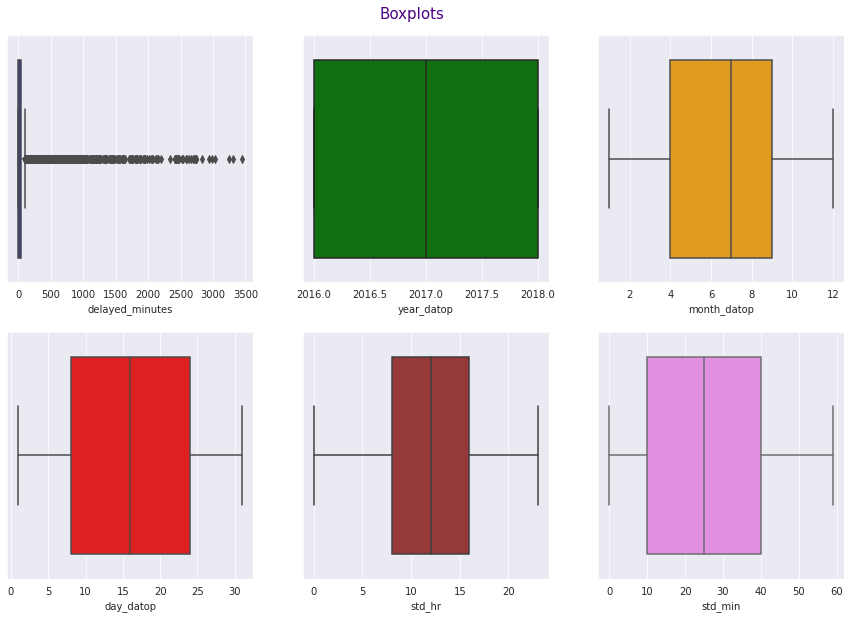

In [ ]:

# BOXPLOTS 

# Creating a list of columns to check for outliers
# Creating a list of colors

numeric_cols

colors = ['blue', 'green', 'orange', 'red', 'brown', 'violet', 'purple', 'yellow']

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))
plt.suptitle('Boxplots', fontsize = 15, y = 0.92, color = 'indigo')
for ax, data, column, color in zip(axes.flatten(), train, numeric_cols, colors):
  sns.boxplot(train[column], ax = ax, color = color)

- All the Numerical columns in the dataset do not have outliers except for the delayed minutes columns. We will however not deal with the outliers in any way i.e drop them since this could be a true observation. 
-NB: The longest delay in history was that of The Pam Am Pacific Clipper which was delayed by a week(160 hours/9600 minutes) on the day of the Pearl Harbour attacks on 7th December 1941 hence giving more reason not to get rid of any outliers in the delayed minutes column. 

#### Test Data

In [15]:
# check number of rows and columns in the data set
print("There are", test.shape[0], "rows and", test.shape[1], "columns in our data set.")

There are 9333 rows and 9 columns in our data set.


The test data has 9,333 records and 9 columns

In [16]:
# Previewing the top of our dataset
test.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ


In [17]:
# Previewing the bottom of our dataset
test.tail()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
9328,test_id_9328,2018-09-12,TU 0998,TUN,NCE,2018-09-12 14:15:00,2018-09-12 15.45.00,ATA,TU 320IMV
9329,test_id_9329,2018-09-27,WKL 0000,TUN,TUN,2018-09-27 22:00:00,2018-09-28 01.00.00,SCH,TU 32AIMG
9330,test_id_9330,2018-09-03,UG 1601,SJJ,TUN,2018-09-03 09:20:00,2018-09-03 11.10.00,SCH,TU CR9ISA
9331,test_id_9331,2018-09-15,UG 0008,TUN,DJE,2018-09-15 14:30:00,2018-09-15 15.30.00,SCH,UG AT7LBD
9332,test_id_9332,2018-09-19,UG 0009,DJE,TUN,2018-09-19 16:15:00,2018-09-19 17.15.00,SCH,UG AT7LBD


In [18]:
# check the data set info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9333 entries, 0 to 9332
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      9333 non-null   object
 1   DATOP   9333 non-null   object
 2   FLTID   9333 non-null   object
 3   DEPSTN  9333 non-null   object
 4   ARRSTN  9333 non-null   object
 5   STD     9333 non-null   object
 6   STA     9333 non-null   object
 7   STATUS  9333 non-null   object
 8   AC      9333 non-null   object
dtypes: object(9)
memory usage: 656.4+ KB


In [19]:
# Checking whether each column has an appropriate datatype
test.dtypes

ID        object
DATOP     object
FLTID     object
DEPSTN    object
ARRSTN    object
STD       object
STA       object
STATUS    object
AC        object
dtype: object

Most of the data has incorrect datatypes, we will change them into correct types during cleaning

In [20]:
# checking for unique values in all the columns
test.nunique()

ID        9333
DATOP       86
FLTID      700
DEPSTN      82
ARRSTN      84
STD       7012
STA       7290
STATUS       5
AC          44
dtype: int64

In [21]:
# we check for null values
test.isnull().sum()

ID        0
DATOP     0
FLTID     0
DEPSTN    0
ARRSTN    0
STD       0
STA       0
STATUS    0
AC        0
dtype: int64

There are no null values.

In [22]:
# check for duplicates
print("There are duplicates in our data set:", test.duplicated().any())

There are duplicates in our data set: False


There are no duplicates.

In [23]:
# check the unique values in each column
for column in test.columns:
  print("***************************", column, "********************************")
  print("This column has", test[column].nunique(), "unique values, they are shown below:\n")
  print(test[column].unique())
  print('________________________________________________________________________________________________\n')

*************************** ID ********************************
This column has 9333 unique values, they are shown below:

['test_id_0' 'test_id_1' 'test_id_2' ... 'test_id_9330' 'test_id_9331'
 'test_id_9332']
________________________________________________________________________________________________

*************************** DATOP ********************************
This column has 86 unique values, they are shown below:

['2016-05-04' '2016-05-05' '2016-05-06' '2016-05-11' '2016-05-23'
 '2016-05-27' '2016-05-28' '2016-05-01' '2016-05-02' '2016-05-03'
 '2016-05-07' '2016-05-13' '2016-05-18' '2016-05-20' '2016-05-21'
 '2016-05-08' '2016-05-09' '2016-05-10' '2016-05-12' '2016-05-14'
 '2016-05-15' '2016-05-16' '2016-05-25' '2016-05-19' '2016-05-26'
 '2016-05-29' '2016-05-17' '2016-05-22' '2016-05-24' '2016-05-30'
 '2017-02-26' '2017-02-27' '2017-02-02' '2017-02-06' '2017-02-10'
 '2017-02-13' '2017-02-14' '2017-02-18' '2017-02-23' '2017-02-07'
 '2017-02-08' '2017-02-17' '2017-02-01'

## 4. External Data Source Validation

### a.Validation

The AI Hack Tunisia 2019 is the biggest ML/AI Hackathon ever in Tunisia, Africa, and the Middle East North Africa (MENA) region. It takes place on 20-22 September. The event is a double hackathon: the first part is an individual Machine Learning Challenge, and the second part is a group competition focused on a specific technology.

With mentors, judges, and competitors from all over the world, it’s going to be a blast!

The data was part of the AI hack Tunisia 2019.

More about the data and competition can be learned [here](https://zindi.africa/competitions/ai-tunisia-hack-5-predictive-analytics-challenge-2)

## 5. Tidying the Dataset

We will start off with cleaning the train dataset followed by test dataset

#### Train

In [24]:
# converting the incorrect datatypes to right data types
train['DATOP'] = pd.to_datetime(train['DATOP'])
train['FLTID'] = train['FLTID'].astype('category')
train['DEPSTN'] = train['DEPSTN'].astype('category')
train['ARRSTN'] = train['ARRSTN'].astype('category')
train['STD'] = pd.to_datetime(train['STD'])

# replacing period with column to get the time column in to the right format
train['STA'] = train['STA'].str.replace('.', ':') 
train['STA'] = pd.to_datetime(train['STA'])
train['STATUS'] = train['STATUS'].astype('category')
train['AC'] = train['AC'].astype('category')

In [25]:
# confirming that the columns have been converted to the right types
train.dtypes

ID                object
DATOP     datetime64[ns]
FLTID           category
DEPSTN          category
ARRSTN          category
STD       datetime64[ns]
STA       datetime64[ns]
STATUS          category
AC              category
target           float64
dtype: object

In [26]:
# Checking for anomalies in the date columns
# first we check split the dates into year, month, day , hr, and min
# splitting DATOP into year, month, day
train['year_datop'] = pd.to_datetime(train['DATOP']).dt.year
train['month_datop'] = pd.to_datetime(train['DATOP']).dt.month
train['day_datop'] = pd.to_datetime(train['DATOP']).dt.day

# splitting STD into hours and minutes
train['std_hr'] = pd.to_datetime(train['STD']).dt.hour
train['std_min'] = pd.to_datetime(train['STD']).dt.minute

# splitting STA into hours and minutes
train['sta_hr'] = pd.to_datetime(train['STA']).dt.hour
train['sta_min'] = pd.to_datetime(train['STA']).dt.minute

In [27]:
# confirming that the split happened
train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,year_datop,month_datop,day_datop,std_hr,std_min,sta_hr,sta_min
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,2016,1,3,10,30,12,55
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,2016,1,13,15,5,16,55
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,2016,1,16,4,10,6,45
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,2016,1,17,14,10,17,0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,2016,1,17,14,30,15,50


In [28]:
# check the years in the data set
train['year_datop'].unique()

array([2016, 2017, 2018])

In [29]:
# check the months in the data set
train['month_datop'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [30]:
# check the days in the data set
train['day_datop'].unique()

array([ 3, 13, 16, 17, 18, 20, 21, 22, 23, 24, 27,  1,  2,  4,  5,  6,  7,
        8, 10, 14, 19, 28, 29, 26, 30, 31, 12, 15, 11, 25,  9])

In [31]:
# check the hours in the data set
train['std_hr'].unique()

array([10, 15,  4, 14, 16,  7, 18, 19, 20, 17,  5,  8, 11,  6,  1, 12,  9,
        0, 22, 23, 13,  3, 21,  2])

In [32]:
# check the minutes in the data set
train['std_min'].unique()

array([30,  5, 10, 20, 15, 35, 40, 45, 55, 50,  0, 25, 46, 19, 13,  1, 39,
       41, 47,  7,  9, 59, 11, 16, 44,  3, 27, 38, 21,  6, 24, 51, 54, 53,
       48, 22, 23, 18, 34, 32,  2, 17, 14, 28, 12,  8, 56, 49, 58, 31, 26,
       43, 37, 57, 42, 36, 29, 52,  4, 33])

In [33]:
# check the scheduled time of arrival hours in the data set
train['sta_hr'].unique()

array([12, 16,  6, 17, 15, 18,  9, 20,  0, 23, 21,  8, 13, 14, 10, 22,  7,
       11,  5, 19,  2,  1,  4,  3])

In [34]:
# check the scheduled time of arrival minutes in the data set
train['sta_min'].unique()

array([55, 45,  0, 50, 15, 30, 40, 10, 20, 25,  5, 35, 31, 34, 47, 43, 59,
        8, 17, 37, 54, 56, 22, 39, 27, 11, 24,  3,  1, 52, 41,  9, 16,  6,
       19, 48, 29, 26, 36, 13, 14, 21,  7, 42, 32,  2, 49, 53, 18, 12, 33,
       51, 23, 28,  4, 38, 44, 46, 58, 57])

We dont see any anomalies on date and time after doing analysis on DATOP, STA and STD

In [35]:
# More data cleaning procedures
# changing the names of columns so that they make more sense

train.rename(columns={'ID': 'id', 'DATOP': 'date_flight', 'FLTID': 'flight_number', 'DEPSTN': 'departure_point', 'ARRSTN': 'arrival_point', 'STD': 'scheduled_time_departure',
             'STA': 'scheduled_time_arrival', 'STATUS': 'status', 'AC': 'aircraft_code', 'target': 'delayed_minutes'}, inplace=True)

In [36]:
# confirming that the column names have been changed
train.head()

,id,date_flight,flight_number,departure_point,arrival_point,scheduled_time_departure,scheduled_time_arrival,status,aircraft_code,delayed_minutes,year_datop,month_datop,day_datop,std_hr,std_min,sta_hr,sta_min
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,2016,1,3,10,30,12,55
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,2016,1,13,15,5,16,55
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,2016,1,16,4,10,6,45
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,2016,1,17,14,10,17,0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,2016,1,17,14,30,15,50


#### Test

In [37]:
# converting the incorrect datatypes to right data types
test['DATOP'] = pd.to_datetime(test['DATOP'])
test['FLTID'] = test['FLTID'].astype('category')
test['DEPSTN'] = test['DEPSTN'].astype('category')
test['ARRSTN'] = test['ARRSTN'].astype('category')
test['STD'] = pd.to_datetime(test['STD'])

# replacing period with column to get the time column in to the right format
test['STA'] = test['STA'].str.replace('.', ':') 
test['STA'] = pd.to_datetime(test['STA'])
test['STATUS'] = test['STATUS'].astype('category')
test['AC'] = test['AC'].astype('category')

In [38]:
# confirming that the columns have been converted to the right types
test.dtypes

ID                object
DATOP     datetime64[ns]
FLTID           category
DEPSTN          category
ARRSTN          category
STD       datetime64[ns]
STA       datetime64[ns]
STATUS          category
AC              category
dtype: object

In [39]:
# Checking for anomalies in the date columns
# first we check split the dates into year, month, day , hr, and min
# splitting DATOP into year, month, day
test['year_datop'] = pd.to_datetime(test['DATOP']).dt.year
test['month_datop'] = pd.to_datetime(test['DATOP']).dt.month
test['day_datop'] = pd.to_datetime(test['DATOP']).dt.day

# splitting STD into hours and minutes
test['std_hr'] = pd.to_datetime(test['STD']).dt.hour
test['std_min'] = pd.to_datetime(test['STD']).dt.minute

# splitting STA into hours and minutes
test['sta_hr'] = pd.to_datetime(test['STA']).dt.hour
test['sta_min'] = pd.to_datetime(test['STA']).dt.minute

In [40]:
# confirming that the split happened
test.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,year_datop,month_datop,day_datop,std_hr,std_min,sta_hr,sta_min
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07:30:00,ATA,TU 32AIMF,2016,5,4,6,40,7,30
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20:05:00,ATA,TU 320IMW,2016,5,5,15,20,20,5
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12:25:00,ATA,TU 32AIMC,2016,5,6,10,0,12,25
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13:10:00,ATA,TU 31BIMO,2016,5,11,9,40,13,10
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12:35:00,ATA,TU 736IOQ,2016,5,11,9,50,12,35


In [41]:
# checking the years in the data set
test['year_datop'].unique()

array([2016, 2017, 2018])

In [42]:
# checking the months in the data set
test['month_datop'].unique()

array([5, 2, 9])

In [43]:
# checking the days in the data set
test['day_datop'].unique()

array([ 4,  5,  6, 11, 23, 27, 28,  1,  2,  3,  7, 13, 18, 20, 21,  8,  9,
       10, 12, 14, 15, 16, 25, 19, 26, 29, 17, 22, 24, 30])

In [44]:
# checking the scheduled departure time hour in the data set
test['std_hr'].unique()

array([ 6, 15, 10,  9, 11, 16, 14, 18, 17,  8, 12, 13, 19,  0,  5, 20, 23,
        7,  1,  2, 22,  4,  3, 21])

In [45]:
# checking the scheduled departure time minute in the data set
test['std_min'].unique()

array([40, 20,  0, 50, 10, 35, 30, 15, 45, 25, 55,  5, 33,  2, 27, 24,  7,
       51, 31,  4,  8, 19, 47, 38, 26, 16, 41, 59, 46, 49, 12, 34, 28, 17])

In [46]:
# checking the scheduled arrival time hour in the data set
test['sta_hr'].unique()

array([ 7, 20, 12, 13, 17, 15, 21, 19, 10,  9, 16,  5,  6,  8, 14, 23, 22,
        4,  2, 18, 11,  1,  0,  3])

In [47]:
# checking the scheduled arrival time minute in the data set
test['sta_min'].unique()

array([30,  5, 25, 10, 35, 40, 15,  0, 55, 45, 20, 50, 47, 54, 56,  1, 31,
       57, 26, 19, 48, 39, 44, 36, 53, 18,  7,  8,  2, 23,  9,  3, 59, 11,
       22, 27])

In [48]:
# More data cleaning procedures
# changing the names of columns so that they make more sense

test.rename(columns={'ID': 'id','DATOP': 'date_flight', 'FLTID': 'flight_number', 'DEPSTN': 'departure_point', 'ARRSTN': 'arrival_point', 'STD': 'scheduled_time_departure',
             'STA': 'scheduled_time_arrival', 'STATUS': 'status', 'AC': 'aircraft_code', 'target': 'delayed_minutes'}, inplace=True)

In [49]:
# confirming that the column names have been changed
test.head()

,id,date_flight,flight_number,departure_point,arrival_point,scheduled_time_departure,scheduled_time_arrival,status,aircraft_code,year_datop,month_datop,day_datop,std_hr,std_min,sta_hr,sta_min
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07:30:00,ATA,TU 32AIMF,2016,5,4,6,40,7,30
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20:05:00,ATA,TU 320IMW,2016,5,5,15,20,20,5
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12:25:00,ATA,TU 32AIMC,2016,5,6,10,0,12,25
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13:10:00,ATA,TU 31BIMO,2016,5,11,9,40,13,10
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12:35:00,ATA,TU 736IOQ,2016,5,11,9,50,12,35


##6. Feature Engineering

In [50]:
# using the datepart on the date_flight column to get the date summaries
test = add_datepart(test,'date_flight')
train= add_datepart(train,'date_flight')

In [51]:
# preview the train data
train.head()

,id,flight_number,departure_point,arrival_point,scheduled_time_departure,scheduled_time_arrival,status,aircraft_code,delayed_minutes,year_datop,month_datop,day_datop,std_hr,std_min,sta_hr,sta_min,date_flightYear,date_flightMonth,date_flightWeek,date_flightDay,date_flightDayofweek,date_flightDayofyear,date_flightIs_month_end,date_flightIs_month_start,date_flightIs_quarter_end,date_flightIs_quarter_start,date_flightIs_year_end,date_flightIs_year_start,date_flightElapsed
0,train_id_0,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,2016,1,3,10,30,12,55,2016,1,53,3,6,3,False,False,False,False,False,False,1451779200
1,train_id_1,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,2016,1,13,15,5,16,55,2016,1,2,13,2,13,False,False,False,False,False,False,1452643200
2,train_id_2,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,2016,1,16,4,10,6,45,2016,1,2,16,5,16,False,False,False,False,False,False,1452902400
3,train_id_3,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,2016,1,17,14,10,17,0,2016,1,2,17,6,17,False,False,False,False,False,False,1452988800
4,train_id_4,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,2016,1,17,14,30,15,50,2016,1,2,17,6,17,False,False,False,False,False,False,1452988800


In [52]:
# preview the test data 
test.head()

,id,flight_number,departure_point,arrival_point,scheduled_time_departure,scheduled_time_arrival,status,aircraft_code,year_datop,month_datop,day_datop,std_hr,std_min,sta_hr,sta_min,date_flightYear,date_flightMonth,date_flightWeek,date_flightDay,date_flightDayofweek,date_flightDayofyear,date_flightIs_month_end,date_flightIs_month_start,date_flightIs_quarter_end,date_flightIs_quarter_start,date_flightIs_year_end,date_flightIs_year_start,date_flightElapsed
0,test_id_0,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07:30:00,ATA,TU 32AIMF,2016,5,4,6,40,7,30,2016,5,18,4,2,125,False,False,False,False,False,False,1462320000
1,test_id_1,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20:05:00,ATA,TU 320IMW,2016,5,5,15,20,20,5,2016,5,18,5,3,126,False,False,False,False,False,False,1462406400
2,test_id_2,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12:25:00,ATA,TU 32AIMC,2016,5,6,10,0,12,25,2016,5,18,6,4,127,False,False,False,False,False,False,1462492800
3,test_id_3,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13:10:00,ATA,TU 31BIMO,2016,5,11,9,40,13,10,2016,5,19,11,2,132,False,False,False,False,False,False,1462924800
4,test_id_4,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12:35:00,ATA,TU 736IOQ,2016,5,11,9,50,12,35,2016,5,19,11,2,132,False,False,False,False,False,False,1462924800


In [53]:
# Creating a function to be used to create delay or not
def result(delayed_minutes):
  if delayed_minutes > 0:
    return 'delayed'
  elif delayed_minutes == 0:
    return 'on time'
  else:
    return 'early'

# Applying the result function to the dataframe
train['result'] = train.delayed_minutes.apply(lambda x: result(x))
train.drop(columns = 'date_flightElapsed', inplace = True)
# Previewing the changes 
train.head(2)

,id,flight_number,departure_point,arrival_point,scheduled_time_departure,scheduled_time_arrival,status,aircraft_code,delayed_minutes,year_datop,month_datop,day_datop,std_hr,std_min,sta_hr,sta_min,date_flightYear,date_flightMonth,date_flightWeek,date_flightDay,date_flightDayofweek,date_flightDayofyear,date_flightIs_month_end,date_flightIs_month_start,date_flightIs_quarter_end,date_flightIs_quarter_start,date_flightIs_year_end,date_flightIs_year_start,result
0,train_id_0,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,2016,1,3,10,30,12,55,2016,1,53,3,6,3,False,False,False,False,False,False,delayed
1,train_id_1,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,2016,1,13,15,5,16,55,2016,1,2,13,2,13,False,False,False,False,False,False,delayed


The seasons are as described [here](https://seasonsyear.com/Tunisia)

In [54]:
# Creating a seasons column
data = [train, test]
for dataset in data:
    dataset.loc[ (dataset['month_datop'] < 3) | (dataset['month_datop'] == 12), 'Season'] = "Winter"
    dataset.loc[(dataset['month_datop'] >= 3) & (dataset['month_datop'] < 6), 'Season'] = "spring"
    dataset.loc[(dataset['month_datop'] >= 6) & (dataset['month_datop'] < 9), 'Season'] = "summer"
    dataset.loc[(dataset['month_datop'] >= 9) & (dataset['month_datop'] < 12), 'Season'] = "fall"
    dataset['Season'] = dataset['Season']

In [55]:
# check the seasons column 
print(train['Season'].unique())
print(test['Season'].unique())

['Winter' 'spring' 'summer' 'fall']
['spring' 'Winter' 'fall']


In [56]:
# find the week of the month
data = [train, test]
for dataset in data:
    dataset.loc[ dataset['day_datop'] <= 7, 'WeekofMonth'] = "Week 1"
    dataset.loc[(dataset['day_datop'] > 7) & (dataset['day_datop'] <= 14), 'WeekofMonth'] = "Week 2"
    dataset.loc[(dataset['day_datop'] > 14) & (dataset['day_datop'] <= 21), 'WeekofMonth'] = "Week 3"
    dataset.loc[(dataset['day_datop'] > 21) & (dataset['day_datop'] <= 28), 'WeekofMonth'] = "Week 4"
    dataset.loc[(dataset['day_datop'] > 28) & (dataset['day_datop'] <= 31), 'WeekofMonth'] = "Week 5"
    dataset['WeekofMonth'] = dataset['WeekofMonth']

In [57]:
# get the unique values 
print(train['WeekofMonth'].unique())
print(test['WeekofMonth'].unique())

['Week 1' 'Week 2' 'Week 3' 'Week 4' 'Week 5']
['Week 1' 'Week 2' 'Week 4' 'Week 3' 'Week 5']


In [58]:
train.head()

,id,flight_number,departure_point,arrival_point,scheduled_time_departure,scheduled_time_arrival,status,aircraft_code,delayed_minutes,year_datop,month_datop,day_datop,std_hr,std_min,sta_hr,sta_min,date_flightYear,date_flightMonth,date_flightWeek,date_flightDay,date_flightDayofweek,date_flightDayofyear,date_flightIs_month_end,date_flightIs_month_start,date_flightIs_quarter_end,date_flightIs_quarter_start,date_flightIs_year_end,date_flightIs_year_start,result,Season,WeekofMonth
0,train_id_0,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,2016,1,3,10,30,12,55,2016,1,53,3,6,3,False,False,False,False,False,False,delayed,Winter,Week 1
1,train_id_1,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,2016,1,13,15,5,16,55,2016,1,2,13,2,13,False,False,False,False,False,False,delayed,Winter,Week 2
2,train_id_2,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,2016,1,16,4,10,6,45,2016,1,2,16,5,16,False,False,False,False,False,False,on time,Winter,Week 3
3,train_id_3,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,2016,1,17,14,10,17,0,2016,1,2,17,6,17,False,False,False,False,False,False,on time,Winter,Week 3
4,train_id_4,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,2016,1,17,14,30,15,50,2016,1,2,17,6,17,False,False,False,False,False,False,delayed,Winter,Week 3


In [59]:
# convert to date time and the required format
# scheduled time departure column
train['scheduled_time_departure'] = pd.to_datetime(train['scheduled_time_departure'], format='%Y-%m-%d %H:%M:%S')
test['scheduled_time_departure'] = pd.to_datetime(test['scheduled_time_departure'], format='%Y-%m-%d %H:%M:%S')

# scheduled time arrival column
train['scheduled_time_arrival'] = pd.to_datetime(train['scheduled_time_arrival'], format='%Y-%m-%d %H.%M.%S')
test['scheduled_time_arrival'] = pd.to_datetime(test['scheduled_time_arrival'], format='%Y-%m-%d %H.%M.%S')

## 7. Exploratory Analysis

### Univariate Analysis
*Measures of Dispersion *

In [ ]:
# determine the measures of dispersion of the price column
print(train["delayed_minutes"].var())
print(train["delayed_minutes"].std())
print(train["delayed_minutes"].skew())
print(train["delayed_minutes"].kurt())

13720.73990509204
117.13556208552568
8.433686640943854
129.82428433225377


- Delayed_time has moderate variance, and is possitively skewed. 

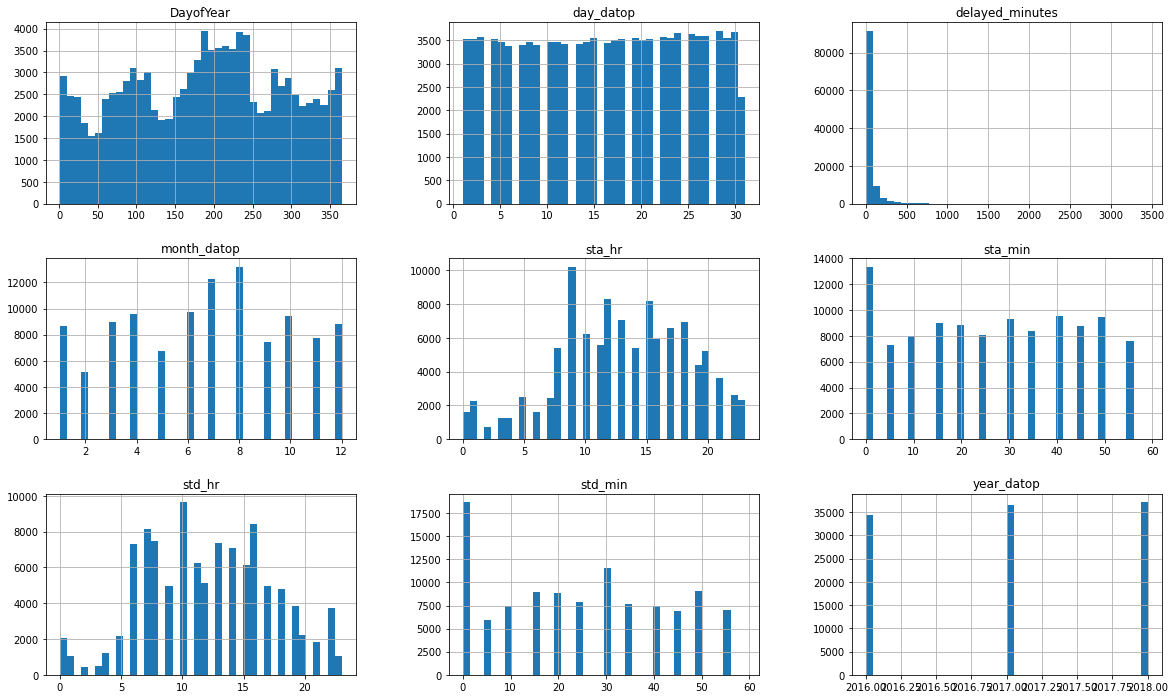

In [ ]:
train.hist(bins=40, figsize=(20, 12))
plt.show()

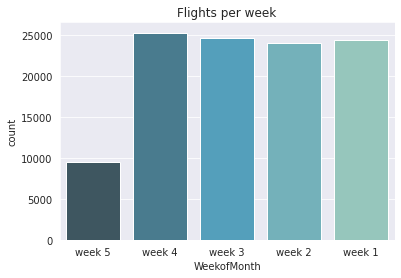

In [ ]:

plt.title('Flights per week')
sns.countplot(train['WeekofMonth'].sort_values(ascending=False),palette="GnBu_d")
plt.show()

- Week 4 has a slightly higher number of flights as compared to the other weeks with slightly higher than 25000 flights weekly as compared to the other weeks which have their value counts slightly lower than 25000. 

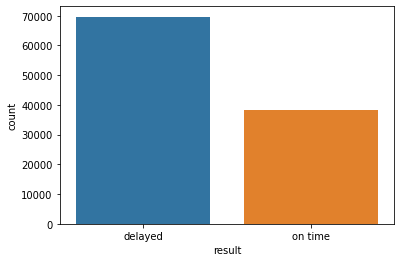

In [ ]:
sns.countplot(train['result'])

- There are more delayed flights as compared to the flights that were on time for the period given(2016-2018) overally. 


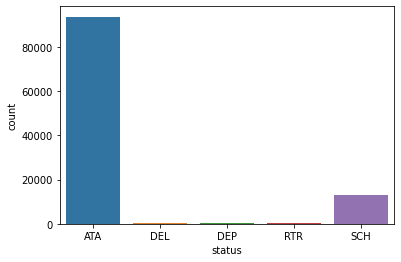

In [ ]:
sns.countplot(train['status'])

- There was a higher number of fights that arrived at the Actual Time of Arrival(ATA).


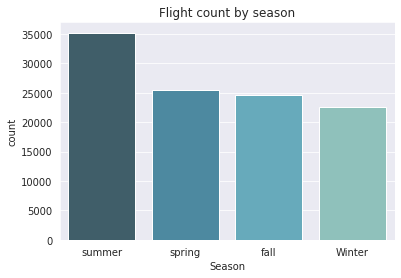

In [ ]:
# countplot
plt.title('Flight count by season')
sns.countplot(train['Season'].sort_values(ascending=False), palette = 'GnBu_d')
plt.show()

The hottest season / summer is in June, July, August and September. Tunis has dry periods in June, July and August. The warmest month is August with an average maximum temperature of 34°C (94°F). 
- This in turn makes it a high/peak season as most people would prefer to travel for holidays(summer)

In [ ]:
numeric_cols = ['delayed_minutes', 'year_datop',
       'month_datop', 'day_datop', 'std_hr', 'std_min', 'sta_hr', 'sta_min', 'DayofYear']

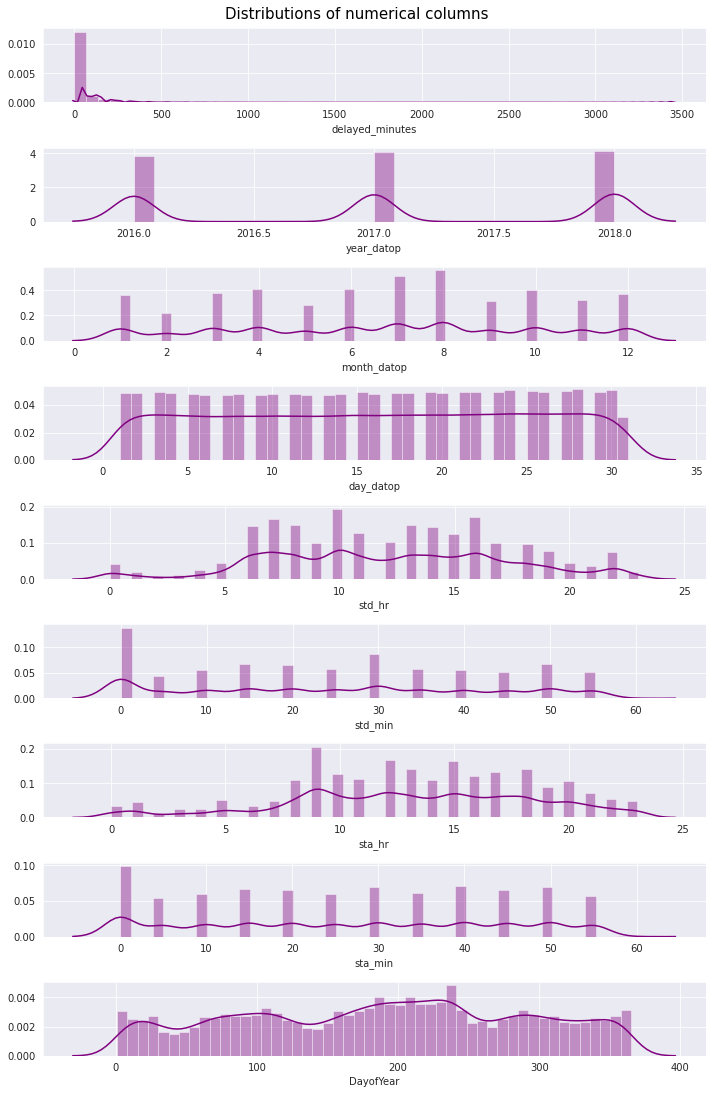

In [ ]:
# DISTRIBUTION PLOTS  for numerical columns 
sns.set_style('darkgrid')
fig, axes = plt.subplots(len(numeric_cols), figsize = (10, 15))
fig.suptitle('Distributions of numerical columns', y= 1.01, color = 'black', fontsize = 15)

for ax, data, name in zip(axes.flatten(), train, numeric_cols):
  sns.distplot(train[name], ax = ax, kde = True, color = 'purple')
plt.tight_layout()

- The year column is normally distributed with a trimodal distribution. 
- Delayed minutes  is positively skewed. 
- There is a steady increase in the number of delays during depatures and arrivals in the mid morning hours up until the late afternoons and evenings
- Day 200 to day aprroximately day 250, there's a higher number of flights recorded. 


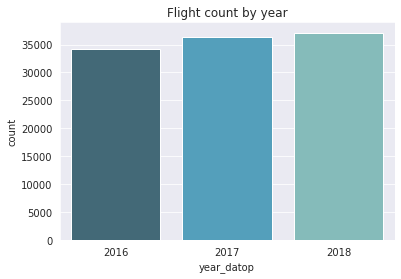

In [ ]:
plt.title('Flight count by year')
sns.countplot(train['year_datop'].sort_values(ascending=False), palette = 'GnBu_d')
plt.show()

In [ ]:
train['year_datop'].value_counts()

2018    37113
2017    36448
2016    34272
Name: year_datop, dtype: int64

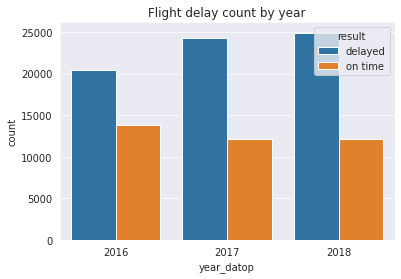

In [ ]:
plt.title('Flight delay count by year')
sns.countplot(train['year_datop'], hue= train.result)
plt.show()

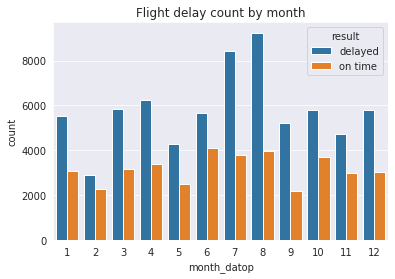

In [ ]:
plt.title('Flight delay count by month')
sns.countplot(train['month_datop'], hue= train.result)
plt.show()

In [ ]:
train.columns

Index(['id', 'date_flight', 'flight_number', 'departure_point',
       'arrival_point', 'scheduled_time_departure', 'scheduled_time_arrival',
       'status', 'aircraft_code', 'delayed_minutes', 'year_datop',
       'month_datop', 'day_datop', 'std_hr', 'std_min', 'sta_hr', 'sta_min',
       'result', 'Season', 'WeekofMonth', 'DayofYear'],
      dtype='object')

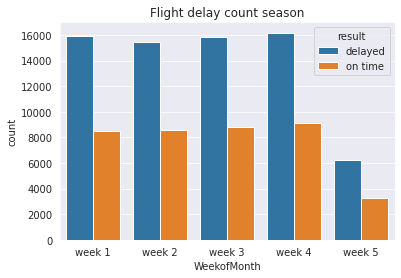

In [ ]:
plt.title('Flight delay count season')
sns.countplot(train['WeekofMonth'], hue= train.result)
plt.show()

###Bivariate  Analysis

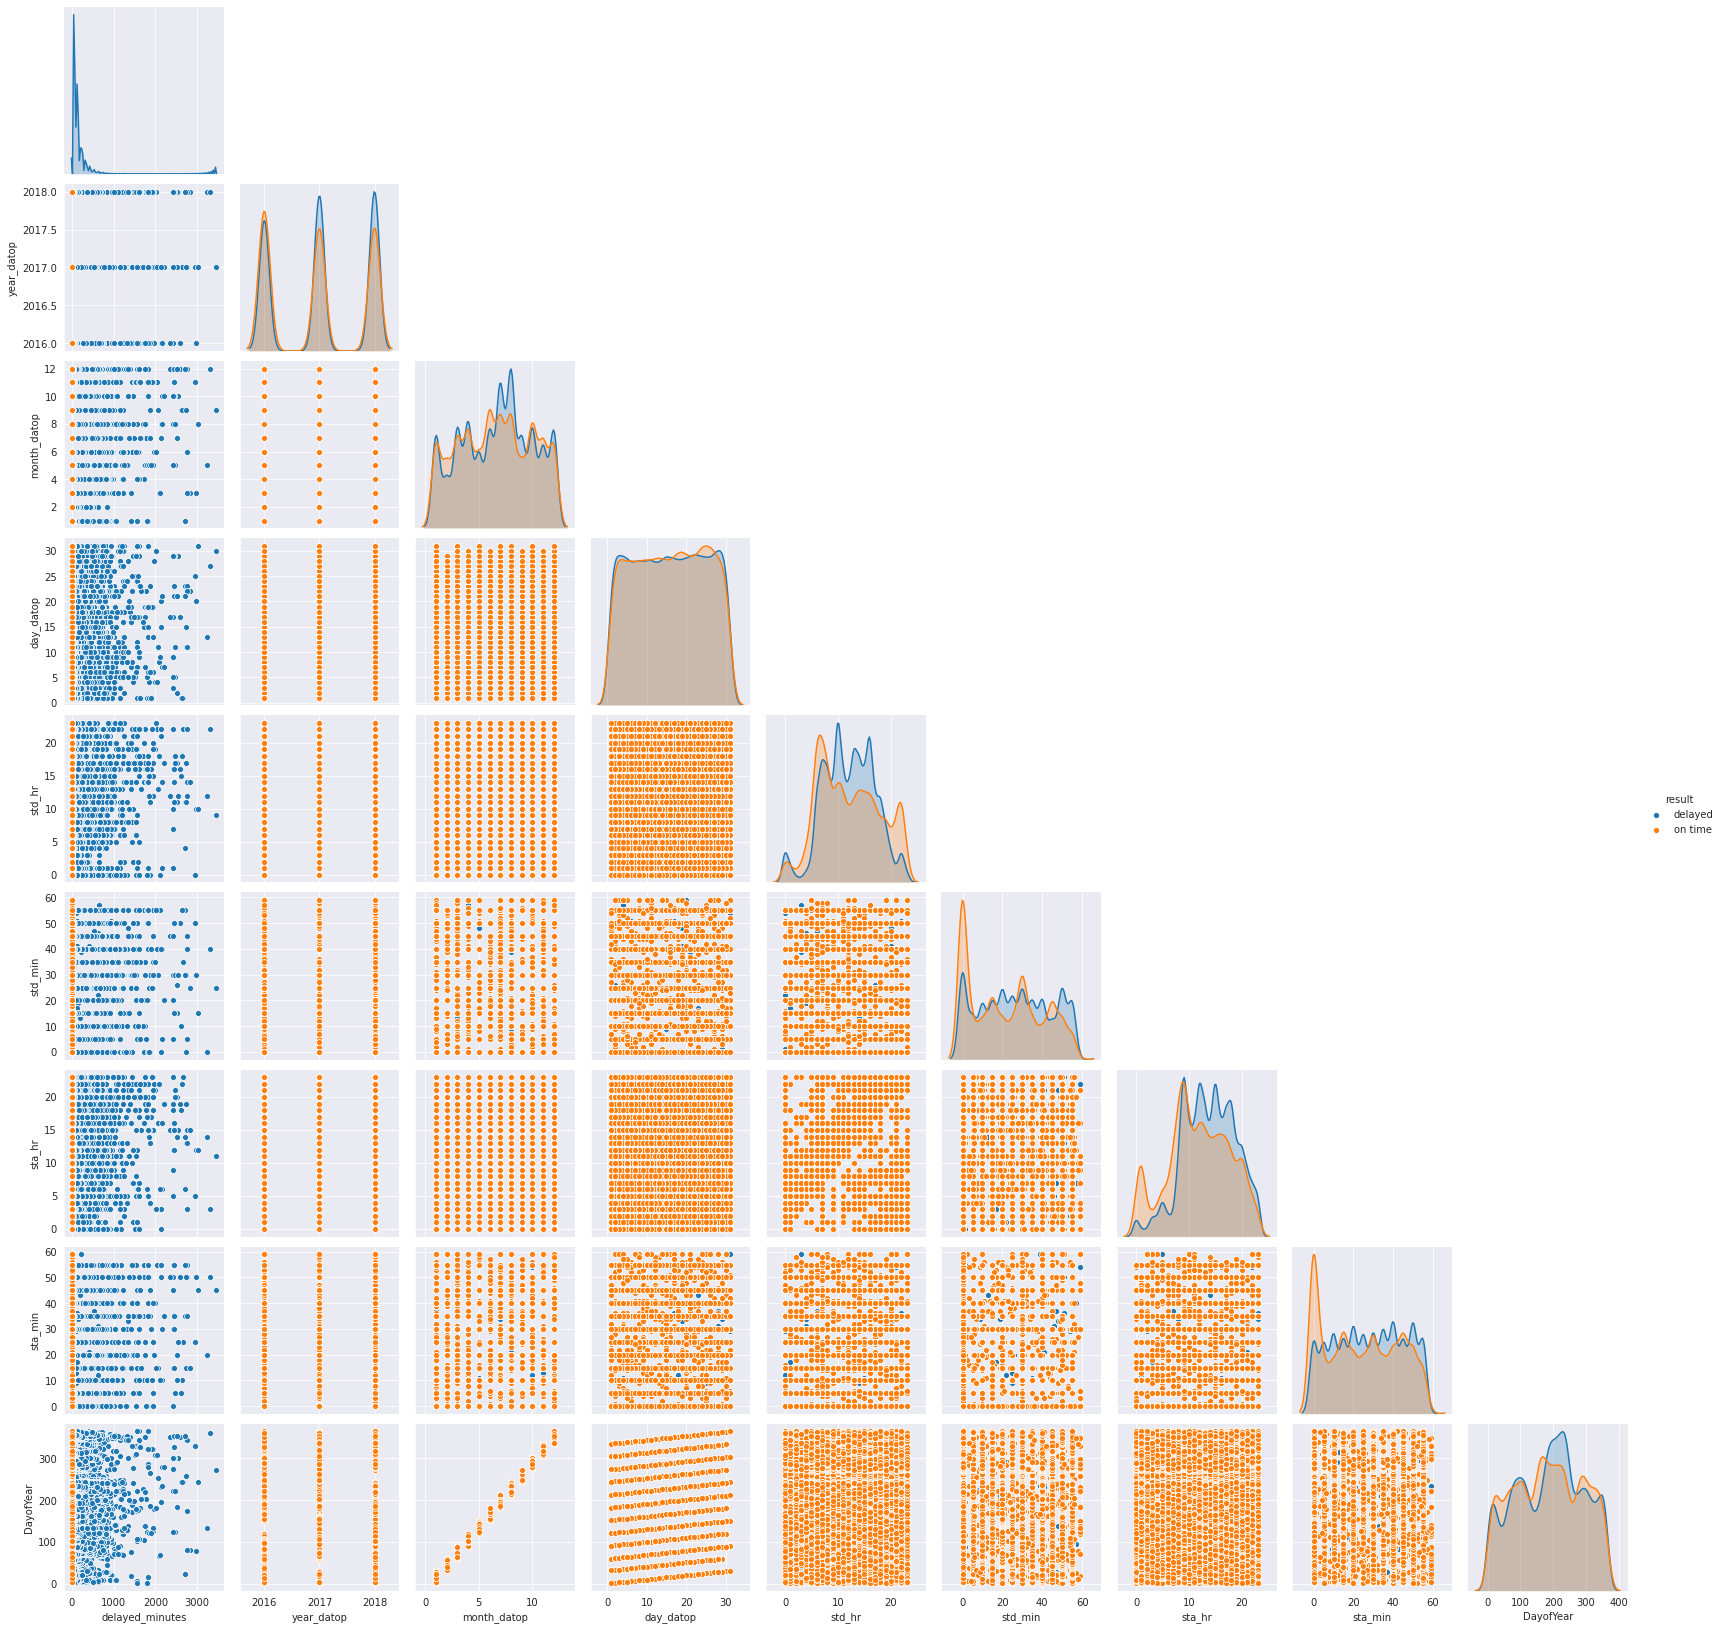

In [ ]:
sns.pairplot(train, hue="result", corner = True) 
plt.show()

From the pairplot:

1) Delayed minutes is positively skewed.

2) For the year 2016, there were more flights that were on time as compared to those that were not on time. However, for the other years 2017 and 2018, the number of delayed flights exceeded the number of flights that were on time. 

3) For the months, the months June to September had higher numbers of flight delays as compared to the flights on time. 

4) Early morning flights tend to have little to no delays as ompared to the afternoon and later in the day flights. 


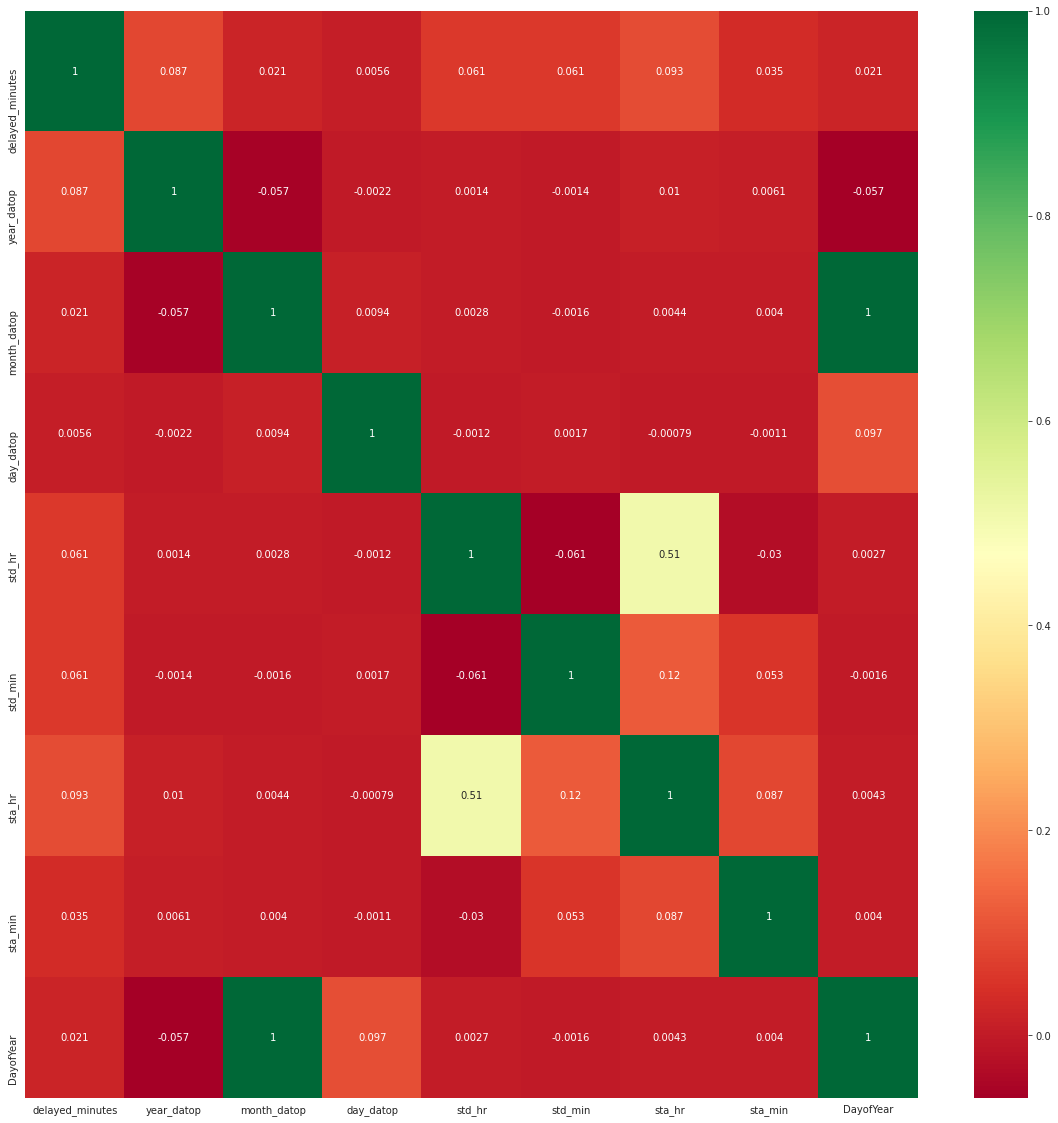

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Most varibles are not strongly correlated to each other apart from monthdatop and day of year.

## 8. Implementing the Solution

In [60]:
# Implementing the Solution

# make a copy of the data sets 
df = train.copy()
df_t = test.copy()

In [61]:
# check number of rows and columns in the data set
print("There are", df.shape[0], "rows and", df.shape[1], "columns in our data set.")

There are 107833 rows and 31 columns in our data set.


In [62]:
# check number of rows and columns in the data set
print("There are", df_t.shape[0], "rows and", df_t.shape[1], "columns in our data set.")

There are 9333 rows and 30 columns in our data set.


In [63]:
# preview the train data set 
df.head()

,id,flight_number,departure_point,arrival_point,scheduled_time_departure,scheduled_time_arrival,status,aircraft_code,delayed_minutes,year_datop,month_datop,day_datop,std_hr,std_min,sta_hr,sta_min,date_flightYear,date_flightMonth,date_flightWeek,date_flightDay,date_flightDayofweek,date_flightDayofyear,date_flightIs_month_end,date_flightIs_month_start,date_flightIs_quarter_end,date_flightIs_quarter_start,date_flightIs_year_end,date_flightIs_year_start,result,Season,WeekofMonth
0,train_id_0,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,2016,1,3,10,30,12,55,2016,1,53,3,6,3,False,False,False,False,False,False,delayed,Winter,Week 1
1,train_id_1,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,2016,1,13,15,5,16,55,2016,1,2,13,2,13,False,False,False,False,False,False,delayed,Winter,Week 2
2,train_id_2,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,2016,1,16,4,10,6,45,2016,1,2,16,5,16,False,False,False,False,False,False,on time,Winter,Week 3
3,train_id_3,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,2016,1,17,14,10,17,0,2016,1,2,17,6,17,False,False,False,False,False,False,on time,Winter,Week 3
4,train_id_4,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,2016,1,17,14,30,15,50,2016,1,2,17,6,17,False,False,False,False,False,False,delayed,Winter,Week 3


In [64]:
# preview the test dataset
df_t.head()

,id,flight_number,departure_point,arrival_point,scheduled_time_departure,scheduled_time_arrival,status,aircraft_code,year_datop,month_datop,day_datop,std_hr,std_min,sta_hr,sta_min,date_flightYear,date_flightMonth,date_flightWeek,date_flightDay,date_flightDayofweek,date_flightDayofyear,date_flightIs_month_end,date_flightIs_month_start,date_flightIs_quarter_end,date_flightIs_quarter_start,date_flightIs_year_end,date_flightIs_year_start,date_flightElapsed,Season,WeekofMonth
0,test_id_0,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07:30:00,ATA,TU 32AIMF,2016,5,4,6,40,7,30,2016,5,18,4,2,125,False,False,False,False,False,False,1462320000,spring,Week 1
1,test_id_1,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20:05:00,ATA,TU 320IMW,2016,5,5,15,20,20,5,2016,5,18,5,3,126,False,False,False,False,False,False,1462406400,spring,Week 1
2,test_id_2,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12:25:00,ATA,TU 32AIMC,2016,5,6,10,0,12,25,2016,5,18,6,4,127,False,False,False,False,False,False,1462492800,spring,Week 1
3,test_id_3,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13:10:00,ATA,TU 31BIMO,2016,5,11,9,40,13,10,2016,5,19,11,2,132,False,False,False,False,False,False,1462924800,spring,Week 2
4,test_id_4,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12:35:00,ATA,TU 736IOQ,2016,5,11,9,50,12,35,2016,5,19,11,2,132,False,False,False,False,False,False,1462924800,spring,Week 2


#### Cat boot regressor

Why catboost? 

1. Reduce time spent on parameter tuning, because CatBoost provides great results with default parameters
2. Improve your training results with CatBoost that allows you to use non-numeric factors, instead of having to pre-process your data or spend time and effort turning it to numbers. 
3. Train your model on a fast implementation of gradient-boosting algorithm for GPU. Use a multi-card configuration for large datasets.
4. Reduce overfitting when constructing your models with a novel gradient-boosting scheme.
5. Apply your trained model quickly and efficiently even to latency-critical tasks using CatBoost's model applier

In [66]:
# get the data types
df.dtypes

id                                     object
flight_number                        category
departure_point                      category
arrival_point                        category
scheduled_time_departure       datetime64[ns]
scheduled_time_arrival         datetime64[ns]
status                               category
aircraft_code                        category
delayed_minutes                       float64
year_datop                              int64
month_datop                             int64
day_datop                               int64
std_hr                                  int64
std_min                                 int64
sta_hr                                  int64
sta_min                                 int64
date_flightYear                         int64
date_flightMonth                        int64
date_flightWeek                         int64
date_flightDay                          int64
date_flightDayofweek                    int64
date_flightDayofyear              

In [87]:
from catboost.utils import get_roc_curve, eval_metric
class cat:
  def __init__ (self, X, y, test_features, X_test):
    self.X = X
    self.y = y
    self.test_features = test_features 
    self.X_test = X_test
  def cats(self):
    # Train using 70% of the data.
    X_train, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
    categ_id = np.where(X_train.dtypes != 'int')[0]
    print(categ_id)
    # fitting the model 
    model = CatBoostRegressor(iterations = 700, depth = 10, l2_leaf_reg = 7, learning_rate = 0.1, task_type = 'GPU')
    model.fit(X_train, y_train, verbose = False, cat_features = categ_id)
    # making predictions 
    pred = model.predict(X_test1)
    # find the rmse 
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))  

    def imp(self, X):
      importances = pd.DataFrame({'feature':X.columns,'importance':np.round(model.feature_importances_,3)})
      importances = importances.sort_values('importance',ascending=False).set_index('feature')
      print("The feature importances are shown below: ",importances)
      # bar plot of the feature importances
      
      importances.plot.bar()
      plt.title("Important features in determining whether a flight is delayed ")
      plt.ylabel('Feature importances')
      plt.xlabel('Features')
      
    imp(self, X)
    def catfish(self, X_test):
      y_pred = model.predict(X_test)
      # check if there are any values less than 0
      #print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

      a = any(y_pred < 0)
   
      if a == True:
        print("There are values less than 0?", any(y_pred<0))
        # display those values 
        #print(y_pred[y_pred < 0])
        # change those values to 0
        y_pred[y_pred < 0] = 0
        print("There are values less than 0?", any(y_pred<0))
        # write to csv
        result = pd.DataFrame({'ID':df_t["id"],'target':y_pred})
        result.to_csv("result.csv",index=False)
      else:
        # write to csv
        result = pd.DataFrame({'ID':df_t["id"],'target':y_pred})
        result.to_csv("result.csv",index=False)
    catfish(self, X_test)

      

In [88]:
# get the dependent and independent variables 
test_features = ['flight_number', 'departure_point', 'arrival_point','status',
       'aircraft_code', 'year_datop', 'month_datop',
       'day_datop', 'std_hr', 'std_min', 'sta_hr', 'sta_min',
       'date_flightYear', 'date_flightMonth', 'date_flightWeek',
       'date_flightDay', 'date_flightDayofweek', 'date_flightDayofyear',
       'date_flightIs_month_end', 'date_flightIs_month_start',
       'date_flightIs_quarter_end', 'date_flightIs_quarter_start',
       'date_flightIs_year_end', 'date_flightIs_year_start', 
       'Season', 'WeekofMonth']

feat = ['flight_number', 'departure_point', 'arrival_point', 'status',
       'aircraft_code', 'year_datop', 'month_datop', 'day_datop', 'std_hr',
       'std_min', 'sta_hr', 'sta_min', 'date_flightYear', 'date_flightMonth',
       'date_flightWeek', 'date_flightDay', 'date_flightDayofweek',
       'date_flightDayofyear', 'date_flightIs_month_end',
       'date_flightIs_month_start', 'date_flightIs_quarter_end',
       'date_flightIs_quarter_start', 'date_flightIs_year_end',
       'date_flightIs_year_start', 'Season', 'WeekofMonth']


In [65]:
df_t['Season'] = df_t['Season'].astype('category')
df_t['WeekofMonth'] = df_t['WeekofMonth'].astype('category')

### Baseline Model

[ 0  1  2  3  4 18 19 20 21 22 23 24 25]
Root Mean Squared Error: 112.51079328208571
The feature importances are shown below:                               importance
feature                                
status                           16.145
flight_number                    14.519
departure_point                  11.949
date_flightDayofyear             11.383
arrival_point                     8.885
Season                            8.701
aircraft_code                     6.937
WeekofMonth                       6.219
date_flightDay                    3.934
date_flightWeek                   3.785
day_datop                         1.930
sta_min                           1.771
std_hr                            1.393
std_min                           0.800
sta_hr                            0.645
month_datop                       0.429
date_flightMonth                  0.186
date_flightIs_month_end           0.154
date_flightIs_month_start         0.107
date_flightIs_quarter_start      

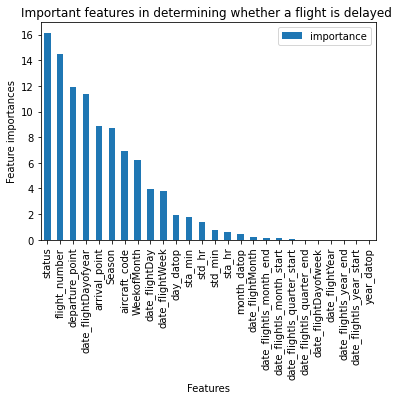

In [90]:
# function call 
X = df[test_features]

y = df['delayed_minutes']
X_test = df_t[feat]
b = cat(X, y, test_features, X_test)
b.cats()

The baseline model gets an RMSE value of 112. This will need to be reduced. From the plot we can observe the most important features and the most important is the date_FlightDay of the year. We will now use 10 of the most important features.

### Cat model with important features

In [91]:
# get 10 of the most important features 
train_f = ['flight_number', 'departure_point', 'arrival_point', 'status', 'aircraft_code', 'date_flightYear', 'Season', 'WeekofMonth',
'date_flightWeek', 'date_flightDay']
test_f = ['flight_number', 'departure_point', 'arrival_point', 'status', 'aircraft_code', 'date_flightYear', 'Season', 'WeekofMonth',
'date_flightWeek', 'date_flightDay']
X = df[train_f]
y = df['delayed_minutes']
X_test = df_t[test_f]

[0 1 2 3 4 6 7]
Root Mean Squared Error: 111.52338755163414
The feature importances are shown below:                   importance
feature                    
flight_number        25.824
arrival_point        17.820
departure_point      16.411
aircraft_code        11.075
status                7.517
Season                6.902
date_flightDay        5.535
WeekofMonth           4.827
date_flightWeek       4.089
date_flightYear       0.000
There are values less than 0? True
There are values less than 0? False


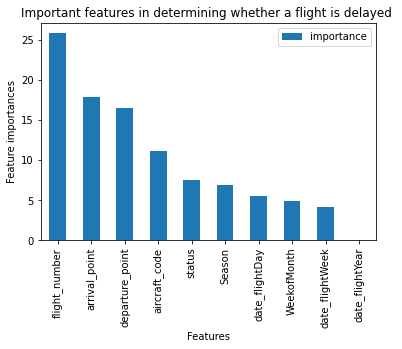

In [92]:
b = cat(X, y, test_features, X_test)
b.cats()

The RMSE of the model has dropped. This is good as the lower the RMSE the better. The most important feature is now the flight_number. We will now tune our model with an aim of reducing the RMSE value.

### Tuned cat model

In [ ]:
# Train using 70% of the data.
X_train, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
categ_id = np.where(X_train.dtypes != 'int')[0]
print(categ_id)
# fitting the model 
model = CatBoostRegressor(iterations = 700, task_type = 'GPU')


[0 1 2 3 4 6 7]


In [ ]:
# set the parameters we want to tune 
from scipy import stats
import catboost
class StrangeDistribution:
    def __init__(self, values):
        self.values = values

    def rvs(self):
        return self.values[0]

param_distribution = {
    'one_hot_max_size': stats.bernoulli(p=0.2, loc=2),
    'learning_rate': StrangeDistribution([0.03, 0.1]),
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'depth': stats.binom(n=10, p=0.2)
}

train_pool = catboost.Pool(X_train, y_train, cat_features=categ_id)
# tune the model
randomized_search_results = model.randomized_search(
    param_distribution,
    train_pool,
    n_iter=12,
    shuffle=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

bestTest = 115.1674665
bestIteration = 698
0:	loss: 115.1674665	best: 115.1674665 (0)	total: 12.6s	remaining: 2m 18s
bestTest = 115.5871762
bestIteration = 693
1:	loss: 115.5871762	best: 115.1674665 (0)	total: 20.7s	remaining: 1m 43s
bestTest = 115.2458992
bestIteration = 699
2:	loss: 115.2458992	best: 115.1674665 (0)	total: 31.8s	remaining: 1m 35s
bestTest = 114.9879679
bestIteration = 696
3:	loss: 114.9879679	best: 114.9879679 (3)	total: 44.7s	remaining: 1m 29s
bestTest = 115.558373
bestIteration = 699
4:	loss: 115.5583730	best: 114.9879679 (3)	total: 52.8s	remaining: 1m 13s
bestTest = 115.5268334
bestIteration = 699
5:	loss: 115.5268334	best: 114.9879679 (3)	total: 1m 1s	remaining: 1m 1s
bestTest = 115.5691257
bestIteration = 687
6:	loss: 115.5691257	best: 114.9879679 (3)	total: 1m 9s	remaining: 49.4s
bestTest = 115.5842742
bestIteration = 697
7:	loss: 115.5842742	best: 114.9879679 (3)	total: 1m 17s	remaining: 38.6s
bestTest = 115.1757391
bestIteration = 693
8:	loss: 115.1757391	bes

In [ ]:
# get the best parameters
randomized_search_results['params']

{'depth': 5.0,
 'l2_leaf_reg': 7,
 'learning_rate': 0.03,
 'one_hot_max_size': 2.0}

In [ ]:
# Train using 70% of the data.
X_train, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
categ_id = np.where(X_train.dtypes != 'int')[0]
print(categ_id)
# fitting the model 
model = CatBoostRegressor(iterations = 700, depth=5, l2_leaf_reg=7, learning_rate=0.03, one_hot_max_size=2, task_type = 'GPU')
model.fit(X_train, y_train, verbose = False, cat_features = categ_id)
# making predictions 
pred = model.predict(X_test1)
# find the rmse 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))  


[0 1 2 3 4 6 7]
Root Mean Squared Error: 113.92403882197898


The assumption was that the performance would imporve, but from the results the RMSE increased. This means that our model does not benefit from hyperparameter tuning. At this point we need to challenge our solution with other models.

## 9. Challenging the solution

#### NN regressor

In [ ]:
#### 1 represents 'tanh' 2 represents 'identity' 3 respresents 'logistic' anything else is 'relu'
# the default.

class nn:
  def __init__(self, X, y, a, X_test):
    self.X = X
    self.y = y
    self.a = a
    self.X_test = X_test
  def n(self, a):
    if a == 1:
      x = 'tanh'
    elif a == 2:
      x = 'identity'
    elif a == 3:
      x = 'logistic'
    else:
      x = 'relu'
   
    
    def magic(self):
      # Splitting the data into train and test sets
      X_train, X_test1, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

      
      # Initialize the scaler
      scaler = StandardScaler()
      # Fitting the scaler
      scaler.fit(X_train)

      # Applying the transformation to the data
      X_train = scaler.transform(X_train)

      X_test1 = scaler.transform(X_test1)
      # creating instance of the model
      mlp = MLPRegressor(hidden_layer_sizes=(50,50), solver='sgd', activation=x) 
      print(mlp)
      # fitting the data
      mlp.fit(X_train,y_train)
      pred = mlp.predict(X_train)
      pred = mlp.predict(X_test1)
      print("The activation used is :", x)
      # Evaluating the performance of ur model
      #print(confusion_matrix(y_test,pred))
      print('-----------------------------------------------')
      #print(classification_report(y_test,pred))
      # predict the test data 
      
      
      # Our first metric is MAE - Mean absolute error
      print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))

      # We can also use MSE - Mean squared error
      print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))  
      
      # Finally, the most popular metric: RMSE - Root mean squared error
      print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))  

    magic(self)
     

In [ ]:
# get 10 of the most important features 
train_f = ['flight_number', 'departure_point', 'arrival_point', 'status', 'aircraft_code', 'date_flightYear', 'Season', 'WeekofMonth',
'date_flightWeek', 'date_flightDay']
test_f = ['flight_number', 'departure_point', 'arrival_point', 'status', 'aircraft_code', 'date_flightYear', 'Season', 'WeekofMonth',
'date_flightWeek', 'date_flightDay']
X = df[train_f]
X = pd.get_dummies(X, drop_first=True)
y = df['delayed_minutes']
X_test = df_t[test_f]
X_test = pd.get_dummies(X_test, drop_first=True)

#### using Identity activation

In [ ]:
# call the class
a = 2
b = nn(X, y, a, X_test)
# call the function
b.n(a)

MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 50), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='sgd',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)
The activation used is : identity
-----------------------------------------------
Mean Absolute Error: 55.48900780612804
Mean Squared Error: 13220.924472412687
Root Mean Squared Error: 114.98227894946545


#### Using Logistic activation

In [ ]:
# call the class
a = 3
b = nn(X, y, a, X_test)
# call the function
b.n(a)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 50), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='sgd',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)
The activation used is : logistic
-----------------------------------------------
Mean Absolute Error: 51.86416639115875
Mean Squared Error: 12542.46664843598
Root Mean Squared Error: 111.9931544713157


#### Using relu activation

In [ ]:
# call the class
a = 0
b = nn(X, y, a, X_test)
# call the function
b.n(a)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 50), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='sgd',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)
The activation used is : relu
-----------------------------------------------
Mean Absolute Error: 54.88328061122952
Mean Squared Error: 12963.498117881983
Root Mean Squared Error: 113.85735864616737


#### Using tahn activation

In [ ]:
# call the class
a = 1
b = nn(X, y, a, X_test)
# call the function
b.n(a)

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 50), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='sgd',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)
The activation used is : tanh
-----------------------------------------------
Mean Absolute Error: 55.412122655571615
Mean Squared Error: 12891.452303324819
Root Mean Squared Error: 113.54053154413546


### XGB Boost

In [ ]:
# get 10 of the most important features 
train_f = ['flight_number', 'departure_point', 'arrival_point', 'status', 'aircraft_code', 'date_flightYear', 'Season', 'WeekofMonth',
'date_flightWeek', 'date_flightDay']
test_f = ['flight_number', 'departure_point', 'arrival_point', 'status', 'aircraft_code', 'date_flightYear', 'Season', 'WeekofMonth',
'date_flightWeek', 'date_flightDay']
X = df[train_f]
X = pd.get_dummies(X, drop_first=True)

y = df['delayed_minutes']
X_test1 = df_t[test_f]
X_test1 = pd.get_dummies(X_test1, drop_first=True)


In [ ]:
XGBModel = XGBRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
XGBModel.fit(X_train, y_train , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(X_test)
MAE = metrics.mean_absolute_error(y_test, XGBpredictions)
print('XGBoost validation MAE = ',MAE)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, XGBpredictions)))  

[19:19:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost validation MAE =  51.49267059502038
Root Mean Squared Error: 109.36947541207172


## 10. Conclusion

The models generally perform in the same range of 109 and 114. This might tell us we need to tune the challenging models. 

In terms of execution time Catboost executed the fastest followed by XGboost. Neural networks took more time to execute and train.

The predictive power of our models is not that high.

The best performing model was XGBoost followed by Catboost and Neural networks came in last.

### a). Did we have the right data?

Yes we did have the right data.

### b). Do we need other data to answer our question?

As it is we do not.

### c). Did we have the right questions?

Yes.

###d). Further questions

If we had the weather information for Tunisia would the models have reduced or increased the RMSE.